# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Khong**  <br/>
Firstname: **Lap Hoe**    <br/>
Student ID: **32114818**    <br/>
Email: **lkho0007@student.monash.edu**    <br/>
Your tutorial time: **Tuesday 2PM**    <br/>
***

This assignment contains **one** parts:

* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement for building your CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [3]:
%load_ext autoreload
%autoreload 2

Install the package `imutils` if you have not installed yet

In [ ]:
! pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

In [120]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [121]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process the experimental data. 

In [122]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)

fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [123]:
data_manager.process_data_label()
data_manager.train_valid_test_split()

In [9]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [10]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [11]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                          

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [12]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Epoch 1/20
63/63 [==============================] - 11s 13ms/step - loss: 2.3103 - accuracy: 0.1077 - val_loss: 2.3000 - val_accuracy: 0.1100
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.2956 - accuracy: 0.1268 - val_loss: 2.3053 - val_accuracy: 0.1240
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 2.3039 - accuracy: 0.1103 - val_loss: 2.3085 - val_accuracy: 0.0880
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 2.3052 - accuracy: 0.0983 - val_loss: 2.3044 - val_accuracy: 0.0920
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 2.3051 - accuracy: 0.0972 - val_loss: 2.3036 - val_accuracy: 0.0920
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 2.3047 - accuracy: 0.0895 - val_loss: 2.3060 - val_accuracy: 0.0920
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 2.3045 - accuracy: 0.0960 - val_loss: 2.3122 - val_accuracy: 0.0920
Epoch 8/20
63/63 [

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [13]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 4ms/step - loss: 2.3086 - accuracy: 0.0900


0.09000000357627869

Below shows how you can inspect the training progress.

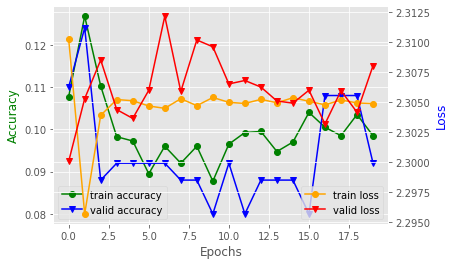

In [14]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [125]:
network1.predict(data_manager.X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

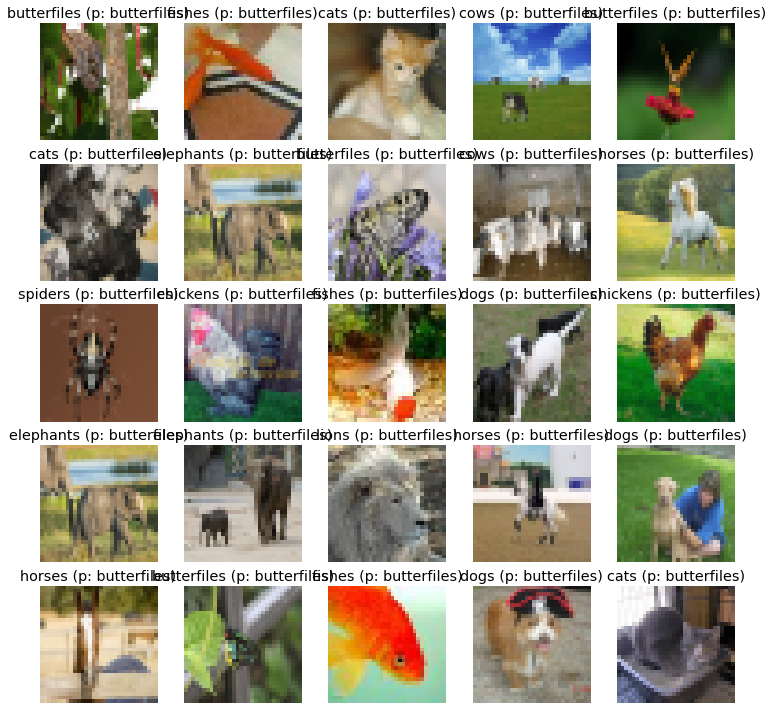

In [124]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red">**Question 3.1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

### Observation
According to my observation, the model did not learn well. We can see this through a few metrics. 
1. The training accuracy does not improve at every iteration. The accuracy is stochastic by nature, and shows no clear pattern of improvement. 
2. Validation accuracy during training is low. The model fails to generalize unseen data during training. 
3. The testing accuracy is low. The model fails to generalize unseen data during testing. 

### Reasoning of possible problems
Remember that the point of optimizers is to modify the weight values at every epoch based on the gradients of weights and biases calculated with respect to the loss function. It is known that the loss landscape for any particular neural network can be complex at times, with many local minimum, maxima and saddle points. It is most likely impossible to reach a global minima due to the vast number of paramaters needed to optimize. Below are a few reasons why this model did not train/test well. 
1. The learning rate for the particular optimizer, specifically Stochastic Gradient Descent, is too large. This random bounce of train and test accuracy as shown in the graph is an indication of overshooting. There are very drastic changes in weights at every epoch, causing a high chance of divergence of gradients instead of convergence to a local minima. 

2. The depth of the CNN is too shallow. Causing a severe underfitting problem as it cannot perform feature extraction well. The features extracted by this CNN cannot recognize any details of the input data. 

### Possible Improvements
There are several improvements that can be made to improve the model. 

1. Hyper-parameter tuning. This is arguably the most important step when developing a new untrained model from scratch. We can test out different learning rate values and optimizers to see which one performs the best. We also need to ensure that our validation accuracy does not deplete as the model trains. Hence there is a need for ` EarlyStopping`.  

2. Increase depth of CNN. This can allow different levels of features to be extracted. Low-level, medium-level up to high-level feature extraction. 

**For questions 3.2 to 3.9, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [18]:
tf.random.set_seed(1234)

<span style="color:red">**Question 3.2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below. Note that the `YourModel` class   is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [20]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',               # network name
                 width=32, height=32, depth=3,  # input size
                 num_blocks=2,   # number of blocks
                 feature_maps=32,# feature map for each conv
                 num_classes=4,  # final logit classes
                 drop_rate=0.2,  # dropout rate to use
                 batch_norm=None,# add batch norm? 
                 is_augmentation=False, # augment data?
                 activation_func='relu',# activation function to use
                 use_skip=True,  # is a skip connection needed
                 optimizer='adam', # optimizer to use
                 batch_size=10, # input batch size
                 num_epochs=20, # number of epochs to train
                 learning_rate=0.0001, # learning rate of optimizers
                 verbose=True): # verbosity of training and fitting
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation,
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)

    # build_block_func allows the build for one block
    def build_block_func(self, feature_map, input_tens):
        
        # The first convolution layer 
        CONV = layers.Conv2D(feature_map, (3, 3),
                             padding='same', strides=(1,1))(input_tens)

        # Batch norm can be optional
        # If None, match to the next layer, else match with a batch norm layer
        if self.batch_norm is not None:
            h = layers.BatchNormalization()(CONV)
        else:
            h = CONV

        h = layers.Activation(self.activation_func)(h)
        h = layers.Conv2D(feature_map, (3, 3), padding='same', strides=(1,1))(h)

        if self.batch_norm is not None:
            h = layers.BatchNormalization()(h)

        # Skip connections are optional, if true, add with CONV output, 
        # ie the very first layer
        if self.use_skip:
            h = layers.Add()([h, CONV])

        h = layers.AveragePooling2D(pool_size=(2, 2), padding='same')(h)
        h = layers.Dropout(rate=self.drop_rate)(h)

        return h

    # Building the whole CNN
    def build_cnn(self):
        X = tf.keras.layers.Input(shape=(32, 32, 3))
        block_output = X
        
        # Each feature map value is one block, and can be looped like this.
        for feature_map in self.feature_maps:
            block_output = self.build_block_func(feature_map, block_output)
        block_output = layers.Flatten()(block_output)
        block_output = layers.Dense(
            self.num_classes, activation="softmax")(block_output)

        self.model = tf.keras.Model(inputs=X, outputs=block_output)
        
    # This makes the model more robust in handling different label formats
    # Depending on how the testing set is processed
    def compile_cnn(self, one_hot=False):
        if not one_hot:
            print("Compiled with logits")
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        else:
            print("Compiled with one_hot")
            self.model.compile(optimizer=self.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    def fit(self, data_manager, batch_size=32, epochs=20, verbose=False):
        self.history= self.model.fit(x=data_manager.X_train, y=data_manager.y_train, validation_data=(data_manager.X_valid, data_manager.y_valid), batch_size=batch_size, epochs=epochs, verbose=verbose)

    def evaluate(self, data_manager):
        return self.model.evaluate(data_manager.X_test, data_manager.y_test)


<span style="color:red">**Question 3.3**</span> **Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.**
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

### Report on both architechtures 
Based on a few metrics of evaluation, it is hard to say which model is better. The performance of both of the models are rather similar. 

#### Accuracy Comparison
It appears that both of the architechtures have similar accuracy on the testing set, although `no_skip` performs a bit better than `skip`, with `skip` having 0.58 acc, and `no_skip` having 0.61 acc. Judging by this metric alone, **the logical conclusion would be `no_skip` is better than `skip`**. However, both of the models have similar range and development of training accuracy.

#### Validation Comparison
Both of the validation accuracy for the models hovers around the range of `0.55 to 0.57` during the 20 epochs of training. 

#### Overfitting concerns and confrontation
Overfitting has clearly occured for both of the models with and without skip. Here we can see that the training accuracy is relatively high for both models, but with low validation accuracy. This shows that both models don't generalize well with new instances. This may also be due to how `dropout` is 0% for both of the models, which is a cheap way to deal with overfitting. 

This makes it hard to properly evaluate if `skip` is better than `no_skip`. The problem is that the architechture already overfits, hence this comparison between `skip` and `no_skip` is not meaningful.  

In [29]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 32, 32, 32)   896         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_12 (BatchN  (None, 32, 32, 32)  128         ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_6 (Activation)      (None, 32, 32, 32)   0           ['batch_normalization_12[0]

In [30]:
our_network_skip.compile_cnn(one_hot=False)
our_network_skip.fit(data_manager, batch_size=32, epochs=20)

Compiled with logits


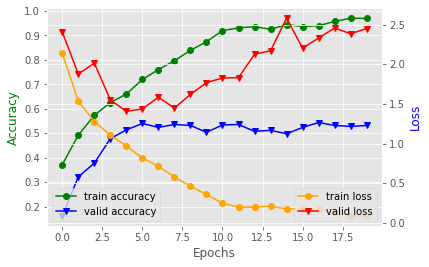

In [31]:
our_network_skip.plot_progress()

In [39]:
loss, acc = our_network_skip.model.evaluate(x=data_manager.X_test, y=data_manager.y_test)
print(f"The accuracy for a skip model is {acc}")

16/16 [==============================] - 0s 4ms/step - loss: 2.3411 - accuracy: 0.5860
The accuracy for a skip model is 0.5860000252723694


In [34]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                          

In [35]:
our_network_no_skip.compile_cnn(one_hot=False)
our_network_no_skip.fit(data_manager, batch_size=32, epochs=20)

Compiled with logits


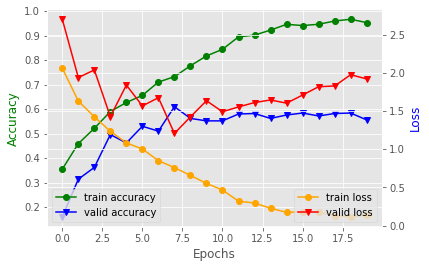

In [36]:
our_network_no_skip.plot_progress()

In [38]:
loss, acc = our_network_no_skip.model.evaluate(x=data_manager.X_test, y=data_manager.y_test)
print(f"The accuracy for a no_skip model is {acc}")

16/16 [==============================] - 0s 4ms/step - loss: 1.8732 - accuracy: 0.6160
The accuracy for a no_skip model is 0.6159999966621399


<span style="color:red">**Question 3.4**</span> **Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.**
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

<img src="Figures\Q3.4_output.png">

### Report on testing accuracy and parameters
I have decided to move my code to colab for CPU training instead. Here the test consists of formats with `number of blocks - skip connection - learning rate`, and we can see that the best model evaluated on the test set found by grid search is using `4 block`, `false skip connection`, and `0.001 learning rate`. However there is a trend of overfitting seen on all of the different hyperparameters. This might be attributed to the low quality of the dataset, and regularization methods not being utilized properly. 


In [40]:
"""GridSeachDNN
This class is a helper class that can allow me to perform hyper-parameter tuning easily.

model_generator: A function that generates compiled models based on a set of parameters
generate_model: A function that generates different models with different parameters
training: The training set to perform tuning on
valid: The validation set to perform tuning on
testing: The testing set to perform tuning on

**kwargs: Pass in the collection of parameters that is used in the tuning process
"""
class GridSearchDNN: 
    def __init__(self, model_generator, generate_model, **kwargs) -> None:
        self.test_models = model_generator(generate_model, **kwargs)
        self.best_model = None 
        self.best_acc = None 
        self.best_desc = None
    
    """ test_iterator 
    This function iteratively trains all generated models. 
    save_progress: Control the saving of each generated model's results 
    save_dir: Directory to save the model to
    verbose: Controls the verbosity of each training iteration 
    
    returns: Returns the best model with the best accuracy on the testing set, and also returns a description of the model. 
    """
    def test_iterator(self, save_progress=False, epochs=5, save_dir="", verbose=True, data_manager=None): 
        best_model, best_acc, best_desc = None, None, None
        for model, desc in self.test_models:
            print(f"--NOW TESTING {desc}--\n")
            history = model.fit(epochs=epochs, verbose=verbose, data_manager=data_manager)
            test_loss, test_acc = model.evaluate(data_manager=data_manager)
            
            # Finds the best evaluation on the test dataset
            if best_acc == None or test_acc > best_acc:
                best_model = model 
                best_acc = test_acc
                best_desc = desc 
            if save_progress:
                model.save(f"models/{save_dir}/{desc}")
            print(f"\n--END TESTING {desc} with test accuracy {test_acc}--")
        
        self.best_model = best_model
        self.best_acc = best_acc
        self.best_desc = best_desc
                
        return best_model, best_acc, best_desc 
    

In [44]:
# Generate a model object 
def generate_model(num_blocks, use_skip, learning_rate): 
    your_model = YourModel(name='network1',
                num_classes=len(data_manager.classes),
                num_blocks=num_blocks,
                use_skip = use_skip,
                optimizer='adam',
                learning_rate= learning_rate)
    your_model.build_cnn()
    your_model.compile_cnn(one_hot=False)
    
    desc = f"{num_blocks}b-skip{use_skip}-lr{str(learning_rate)}"
    
    return your_model, desc

def model_generator(generate_model, **kwargs): 
    all_models = [] 
    for num_block in kwargs.get('num_blocks'):
        for skip in kwargs.get('use_skip'):
            for lr in kwargs.get('lrs'):
                your_model, desc = generate_model(num_block, skip, lr)
                all_models.append((your_model, desc))    
    return all_models    

# Initializing all of the hyperparameters that are needed to be tested
grid_search = GridSearchDNN(
    model_generator, 
    generate_model, 
    num_blocks=[2,3,4], use_skip=[True, False], lrs=[0.001, 0.0001]) 

# Go through each model compiled with different hyperparameters and select the best one with highest test accuracy
_, best_acc, best_desc = grid_search.test_iterator(save_progress=False, save_dir="models/q3.4", epochs=20, verbose=False, data_manager=data_manager)
print(f"The model with the best testing accuracy is {best_desc}")

Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
Compiled with logits
--NOW TESTING 2b-skipTrue-lr0.001--

16/16 [==============================] - 0s 3ms/step - loss: 1.9622 - accuracy: 0.5840

--END TESTING 2b-skipTrue-lr0.001 with test accuracy 0.5839999914169312--
--NOW TESTING 2b-skipTrue-lr0.0001--

16/16 [==============================] - 0s 3ms/step - loss: 1.5071 - accuracy: 0.4800

--END TESTING 2b-skipTrue-lr0.0001 with test accuracy 0.47999998927116394--
--NOW TESTING 2b-skipFalse-lr0.001--

16/16 [==============================] - 0s 4ms/step - loss: 2.1020 - accuracy: 0.5740

--END TESTING 2b-skipFalse-lr0.001 with test accuracy 0.5740000009536743--
--NOW TESTING 2b-skipFalse-lr0.0001--

16/16 [==============================] - 0s 3ms/step - loss: 1.4871 - accuracy: 0.5140

--END TESTING 2b-sk

<span style="color:red">**Question 3.5**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

### Testing setup 
The best combination obtained from the above was `3 blocks`, `skip False`, and `lr of 0.001`. We will be using this model to test for image augmentation. 

### Testing results
- Image Augmentation for horizontal flipping has made the model slightly better. 
- There is an improvement from image augmentation accuracy

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [47]:
""" ImageAugmentation inherits from YourModel. 
1. This is because of the build_cnn function which is rather repetitive. 
This class answers question 3.5 which is used to generate images which will be augmented prior to fitting. 
The augmentation techniques are not complex, it is simply a horizontal flip randomly. 
"""
class ImageAugmentation(YourModel):
    def __init__(self,
                 name='image_augmentation',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def augment_data(self, data_manager):
        # Randomly flip and zoom images 
        datagen = ImageDataGenerator(horizontal_flip=True)
        datagen.fit(data_manager.X_train, augment=True)
    
        # Setting shuffle to False lets me compare with the original data. 
        it = datagen.flow(data_manager.X_train, data_manager.y_train, shuffle=False, seed=123) 
        return it
    
    """ Generates a few sample images after image augmentation, just for verification purposes
    1. Only generates images from a batch 
    2. Number of images to visualize must be less than batch size
    """
    def visualize_augmented(self, data_manager, no_images=2):
        
        if no_images > self.batch_size:
            raise ValueError("Number of images must be less than batch size")
        
        # Iterator for augmentation generator
        it = self.augment_data(data_manager)
        
        # Getting one batch from the whole fit. 
        x_batch, y_batch = next(it) 
        x_train, y_train = data_manager.X_train[:self.batch_size], data_manager.y_train[:self.batch_size]
        
        # Storing each augmented image and label individually. 
        augmented_image = [] 
        augmented_labels = []
        
        # For every single generated image, we need to scale it so .imshow() can display it properly
        for i in range(no_images):
            x_batch[i] = (x_batch[i] + 1.0) / 2 # Scale the image such that it can be displayed with .imshow()
            augmented_image.append(x_batch[i])
            augmented_labels.append(y_batch[i]) 
            
        # Clear any existing plot
        plt.clf() 

        # Setting up figure size for canvas 
        fig, ax = plt.subplots(no_images, 2, figsize=(5 * no_images, 5 * no_images)) 

        # Display the augmented image, before and after augmentation 
        for i in range(no_images):
            ax[i, 0].imshow(augmented_image[i])
            ax[i, 0].set_title("Augmented image")
            ax[i, 1].imshow((x_train[i] + 1.0) / 2)
            ax[i, 1].set_title("Original image")

            ax[i, 0].grid(False)
            ax[i, 0].axis('off')
            ax[i, 1].axis('off')
        
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):    
        if self.is_augmentation:
            it = self.augment_data(data_manager=data_manager)
            # Early stopping with patience value of 3. It will check for an incremenet in val_accuracy for max 3 iterations before terminating.
            # if the conditions are not met 
            early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, mode="max")
            self.history = self.model.fit(it, validation_data=(data_manager.X_valid, data_manager.y_valid), batch_size=None, epochs=self.num_epochs, callbacks=[early_stopping])
        else:
            self.history = self.model.fit(x=data_manager.X_train, y=data_manager.y_train, validation_data=(data_manager.X_valid, data_manager.y_valid), batch_size=batch_size, epochs=self.num_epochs)
        

<Figure size 432x288 with 0 Axes>

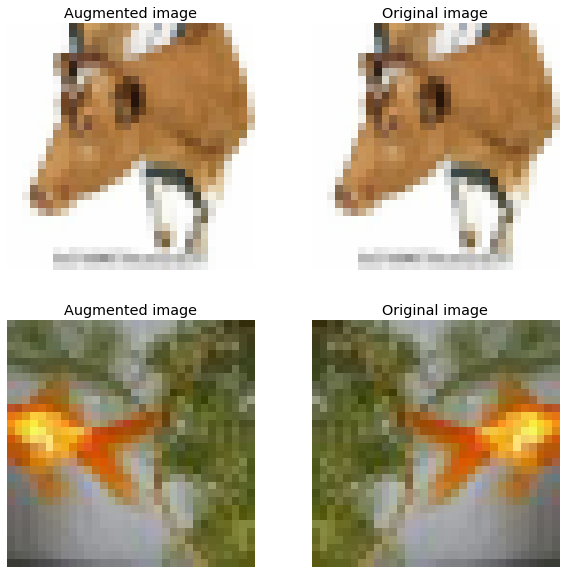

In [126]:
augmented_model = ImageAugmentation(num_blocks=3, use_skip=True, learning_rate=0.001, is_augmentation=True, batch_size=32, num_classes=10)

# Since the images are randomly augmented, there are some images that remain the same
# The first example shows that the original image and the augmented image remains the same
# It is important to not augment all of the images, and only apply this transformation randomly. 
augmented_model.visualize_augmented(data_manager=data_manager, no_images=2)

In [51]:
augmented_model.build_cnn()
augmented_model.compile_cnn(one_hot=False)
augmented_model.fit(data_manager, batch_size=None)

Compiled with logits
Epoch 1/20
125/125 [==============================] - 2s 8ms/step - loss: 2.7003 - accuracy: 0.2030 - val_loss: 1.8089 - val_accuracy: 0.3180
Epoch 2/20
125/125 [==============================] - 1s 6ms/step - loss: 1.7524 - accuracy: 0.3848 - val_loss: 1.6620 - val_accuracy: 0.4400
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 1.5520 - accuracy: 0.4510 - val_loss: 1.5349 - val_accuracy: 0.4640
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 1.4131 - accuracy: 0.5130 - val_loss: 1.3134 - val_accuracy: 0.5560
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 1.3245 - accuracy: 0.5380 - val_loss: 1.3085 - val_accuracy: 0.5220
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 1.2393 - accuracy: 0.5717 - val_loss: 1.1801 - val_accuracy: 0.5780
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 1.1709 - accuracy: 0.5972 - val_loss: 1.1951 - val_ac

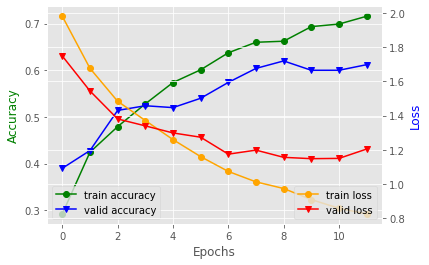

In [50]:
augmented_model.plot_progress()

### Outcome of preliminary fitting
- EarlyStopping termination has occured. 
- The training stopped at the 15th iteration
- The code runs fine, and we can continue fine-tuning the model.  

<span style="color:red">**Question 3.6**</span> **Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and non-using it.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

# Observation and Answer
There seems to be a significant jump in testing accuracy

In [58]:
best_model = None
all_models = []

for augment in [True, False]:
  model = ImageAugmentation(num_blocks=3, use_skip=False, learning_rate=0.001, is_augmentation=augment, batch_size=32, num_classes=10)
  model.build_cnn()
  model.compile_cnn(one_hot=False)
  model.fit(data_manager)
  loss, acc = model.model.evaluate(data_manager.X_test, data_manager.y_test)
  all_models.append([augment, loss, acc])
  if best_model == None or acc > best_model[1]:
    best_model = model, acc, augment
    

Compiled with logits
Epoch 1/20
125/125 [==============================] - 1s 8ms/step - loss: 2.0121 - accuracy: 0.2760 - val_loss: 1.7401 - val_accuracy: 0.3420
Epoch 2/20
125/125 [==============================] - 1s 6ms/step - loss: 1.7131 - accuracy: 0.3880 - val_loss: 1.6423 - val_accuracy: 0.4260
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 1.5369 - accuracy: 0.4652 - val_loss: 1.4569 - val_accuracy: 0.4900
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 1.4247 - accuracy: 0.5020 - val_loss: 1.3265 - val_accuracy: 0.5400
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 1.2799 - accuracy: 0.5623 - val_loss: 1.3500 - val_accuracy: 0.5340
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 1.2147 - accuracy: 0.5778 - val_loss: 1.3582 - val_accuracy: 0.5480
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 1.1734 - accuracy: 0.6030 - val_loss: 1.2510 - val_ac

In [60]:
print(f"No augmentation has a testing accuracy if {all_models[0][2]}")
print(f"Augmentation has a testing accuracy of {all_models[1][2]}")
print(f"The best model is when setting augment to {best_model[-1]}")

No augmentation has a testing accuracy if 0.628000020980835
Augmentation has a testing accuracy of 0.6259999871253967
The best model is when setting augment to True


<span style="color:red">**Question 3.7**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

# Observation on data mixup 
After performing a lot of research on this particular topic, and personally implementing it. I have come to realize that data mixup is a very simple and elegant solution to **"smoothing"**, decision boundaries. I have summarized my findings below. 

### Why we need data mixup?
When we are training a model $f_{\theta}(x_{input})$, it is impossible to obtain a dataset that represents the true distribution of the data. Hence, our samples are at best a randomly sampled dataset from an infinite data source. Since our dataset is not the true distribution, we can only train our model based on minimizing empirical loss, $l_{loss}(y_{pred}, y_{true})$. 
- When a model starts training, it will start drawing decision boundaries that can differentiate between different classes. 
- After the decision boundaries are drawn, the researchers realized that there are *gaps* between the decision boundaries, that have no clear decisions. 
- The researchers decided that we can mix the data up, through $\text{linear interpolation}$ between two randomly sampled data points. To fill in the gaps between the decision boundaries. 
- This improves the prediction scores as now the model can learn about "in-between" data points. 
- Now the dataset will contain pictures of normal images, and mixed up images. Through my own inference, we still need normal images to draw the an accurate decision boundary between each class. 
- Then the mixed-up images will fill in the gap between the decision boundaries. 
- The degree of mixup between two images from two different classes is determined by a hyperparameter $\lambda$ that is sampled from a $\beta$ distribution. 

### Supposed benefits of data mixup 
- Improved generalization, leading to more stable validation accuracy, and testing accuracy. 
- Reduced overfitting, due to the creation of more "synthetic" data. 
- Higher confidence when deciding on soft decision boundaries. 

### Observed outcome and comments from this experiment 
Based on the results, I can say that data mixup did indeed do the task it's supposed to do. 

**Observations**
- We have **closed down the gap** between validation and training accuracy. Compared to models above with no mixup. The accuracy values are closely coupled at around 44%. 
- The `plot_progress` from the model above with no mixup (i.e Setting augmentation to `True`) the gap between `val_accuracy` and `train_accuracy` is bigger compared to mixup model. 

**Comments**
- One of the supposed benefits of data mixup is improved generalization, and reduced overfitting. 
- This means that the mix-up model can generalize well onto new data. Our model will not be experiencing overfitting. However it seems like the model is currently underfitting, due to **low testing accuracy of 43%**. If we have a larger dataset, our `Mixup` model will outperform other models. 

### Conclusion continuing the assignment
However, due to the issue of underfitting for `Mixup`, I will not be using the mixup data for following questions. 



In [127]:
from copy import deepcopy

class DataMixup(YourModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=10, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 use_data_mixup=False):
        self.use_data_mixup = use_data_mixup
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
        
    
    def augment_data(self):
        # Randomly flip and zoom images 
        datagen = ImageDataGenerator(horizontal_flip=True)
        datagen.fit(self.X_train, augment=True)
    
        # Setting shuffle to False lets me compare with the original data. 
        it = datagen.flow(self.X_train, self.y_train, shuffle=False, seed=123) 
        return it
    
    """ Generates a few sample images after image augmentation
    1. Only generates images from a batch 
    2. Number of images to visualize must be less than batch size
    """
    def visualize_augmented(self, data_manager, no_images=2):
        
        if no_images > self.batch_size:
            raise ValueError("Number of images must be less than batch size")
        
        # Iterator for augmentation generator
        it = self.augment_data(data_manager)
        
        # Getting one batch from the whole fit. 
        x_batch, y_batch = next(it) 
        x_train, y_train = data_manager.X_train[:self.batch_size], data_manager.y_train[:self.batch_size]
        
        augmented_image = [] 
        augmented_labels = []
        
        for i in range(no_images):
            x_batch[i] = (x_batch[i] + 1.0) / 2
            augmented_image.append(x_batch[i])
            augmented_labels.append(y_batch[i]) 
            
        # Clear any existing plots 
        plt.clf() 
        fig, ax = plt.subplots(no_images, 2, figsize=(5 * no_images, 5 * no_images)) 
        
        for i in range(no_images):
            ax[i, 0].imshow(augmented_image[i])
            ax[i, 0].set_title("Augmented image")
            ax[i, 1].imshow((x_train[i] + 1.0) / 2)
            ax[i, 1].set_title("Original image")

            ax[i, 0].grid(False)
            ax[i, 0].axis('off')
            ax[i, 1].axis('off')
    
    
    def sample_beta_distribution(self,size, concentration_0=0.2, concentration_1=0.2):
        gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1, dtype='float64')
        gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0, dtype='float64')
        return gamma_1_sample / (gamma_1_sample + gamma_2_sample)
    
    def data_mixup(self, data_manager, alpha, mixup_batches, batch_size=32, visualize=False):

        data_manager = deepcopy(data_manager)
        
        if mixup_batches > len(data_manager.X_train) // batch_size:
            raise ValueError(f"Too many batches, max mixup batches is {len(data_manager.X_train) // batch_size}")
        
        # Here we have a "copy" of the original dataset so we do not tamper with the original dataset 
        self.X_train = data_manager.X_train
        self.y_train = tf.keras.utils.to_categorical(data_manager.y_train)
        self.y_test = tf.keras.utils.to_categorical(data_manager.y_test)
        self.y_valid = tf.keras.utils.to_categorical(data_manager.y_valid)
        data_manager.y_train = tf.keras.utils.to_categorical(data_manager.y_train)
        data_manager.y_test = tf.keras.utils.to_categorical(data_manager.y_test)
        data_manager.y_valid = tf.keras.utils.to_categorical(data_manager.y_valid)

        # We will mixup our data based on the number of input batches
        for i in range(mixup_batches):
            # This method works because we would want to 
            images_one, labels_one = data_manager.next_batch(batch_size=batch_size)
            images_two, labels_two = data_manager.next_batch(batch_size=batch_size)
            batch_size = tf.shape(images_one)[0]

            # Sample lambda and reshape it to do the mixup
            l = self.sample_beta_distribution(batch_size, alpha, alpha)
            x_l = tf.reshape(l, (batch_size, 1, 1, 1))
            y_l = tf.reshape(l, (batch_size, 1))

            # Perform mixup on both images and labels by combining a pair of images/labels
            # (one from each dataset) into one image/label
            images = images_one * x_l + images_two * (1 - x_l)
            labels = tf.cast(labels_one, dtype="float64") * y_l + tf.cast(labels_two, dtype="float64") * (1 - y_l)
            
            self.X_train = np.append(self.X_train, images, axis=0) 
            self.y_train = np.append(self.y_train, labels, axis=0)

            # Visualize 10 images from the last batch
            if visualize and i == mixup_batches - 1:
                plt.clf() 
                fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(7,10))
                for i in range(5):
                    ax[i, 0].imshow((images_one[i] + 1.0) / 2) 
                    ax[i, 0].set_title("Image 1")
                    ax[i, 0].set_axis_off() 

                    ax[i, 1].imshow((images_two[i] + 1.0) / 2)
                    ax[i, 1].set_title("Image 2")
                    ax[i, 1].set_axis_off() 
                    
                    ax[i, 2].imshow((images[i] + 1.0) / 2) 
                    ax[i, 2].set_title("Mixed Output")
                    ax[i, 2].set_axis_off()

    def fit(self, data_manager, batch_size=None, num_epochs=None, mixup_batches=5, alpha=0.2):

        # We need to compare our validation set with one_hot labels due to mixup 
        self.y_valid = tf.keras.utils.to_categorical(data_manager.y_valid)
    
        # Mixup is performed first prior to feeding it into the ImageDataGenerator
        if self.data_mixup and self.is_augmentation:
            self.data_mixup(data_manager=data_manager, alpha=alpha, mixup_batches=mixup_batches, visualize=False)
            it = self.augment_data()
            early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, mode="max")
            self.history = self.model.fit(it, validation_data=(data_manager.X_valid, self.y_valid),batch_size=None, epochs=self.num_epochs)
        else:
            self.history = self.model.fit(x=data_manager.X_train, y=data_manager.y_train, validation_data=(data_manager.X_valid, data_manager.y_valid), batch_size=batch_size, epochs=self.num_epochs)
        


Compiled with one_hot


<Figure size 432x288 with 0 Axes>

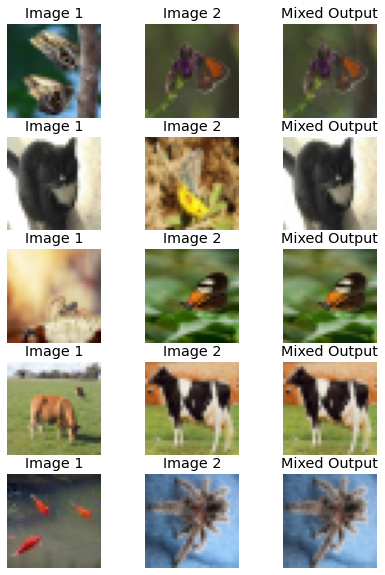

In [137]:
augmented_model = DataMixup(is_augmentation=True, use_data_mixup=True, batch_size=32, num_classes=10)
augmented_model.build_cnn()
augmented_model.compile_cnn(one_hot=True)
augmented_model.data_mixup(data_manager=data_manager, alpha=0.2, mixup_batches=100, visualize=True)

In [138]:
augmented_model.fit(data_manager, mixup_batches=20, num_epochs=20)

Epoch 1/20
145/145 [==============================] - 2s 7ms/step - loss: 2.1299 - accuracy: 0.2338 - val_loss: 2.0093 - val_accuracy: 0.2760
Epoch 2/20
145/145 [==============================] - 1s 6ms/step - loss: 1.9054 - accuracy: 0.3347 - val_loss: 1.9060 - val_accuracy: 0.3420
Epoch 3/20
145/145 [==============================] - 1s 6ms/step - loss: 1.8023 - accuracy: 0.3754 - val_loss: 1.8495 - val_accuracy: 0.3720
Epoch 4/20
145/145 [==============================] - 1s 6ms/step - loss: 1.7208 - accuracy: 0.4058 - val_loss: 1.8258 - val_accuracy: 0.3640
Epoch 5/20
145/145 [==============================] - 1s 6ms/step - loss: 1.6678 - accuracy: 0.4252 - val_loss: 1.7413 - val_accuracy: 0.3960
Epoch 6/20
145/145 [==============================] - 1s 6ms/step - loss: 1.6100 - accuracy: 0.4481 - val_loss: 1.7212 - val_accuracy: 0.4300
Epoch 7/20
145/145 [==============================] - 1s 6ms/step - loss: 1.5823 - accuracy: 0.4599 - val_loss: 1.7207 - val_accuracy: 0.4140
Epoch 

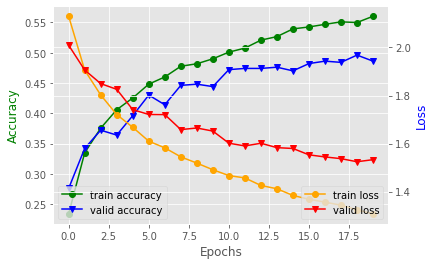

In [139]:
augmented_model.plot_progress() # Observed to have a smaller gap compared to the models above. However it also indicates underfitting issue. 

<Figure size 432x288 with 0 Axes>

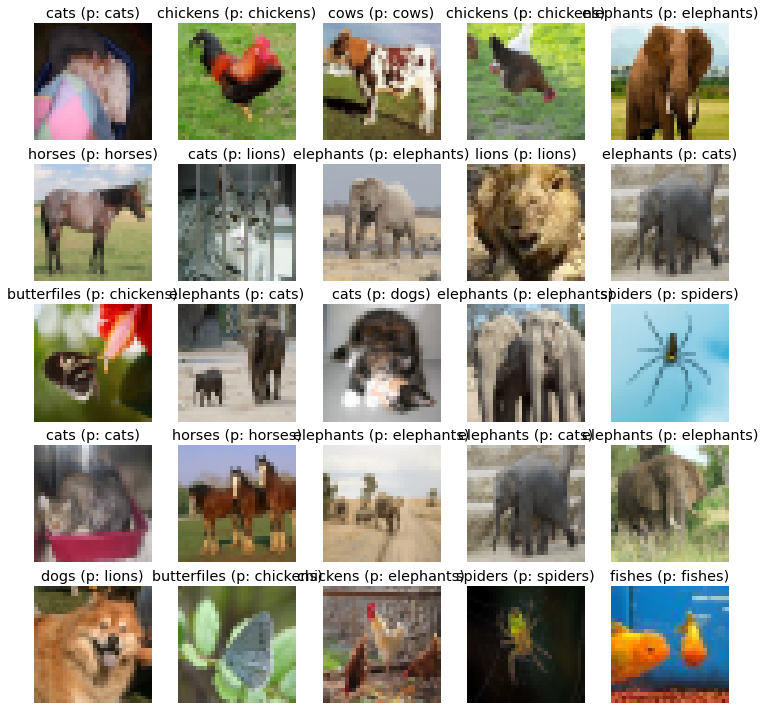

In [140]:
augmented_model.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes) 

In [141]:
augmented_model.model.evaluate(x=data_manager.X_test, y=tf.keras.utils.to_categorical(data_manager.y_test)) # This indicates underfitting issue. 

16/16 [==============================] - 0s 4ms/step - loss: 1.4562 - accuracy: 0.5220


[1.4561834335327148, 0.5220000147819519]

<span style="color:red">**Question 3.8**</span> **Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

# Observation and comments
The attacks are taken from Week 7 Tutorials, but with a very slight modification. The default values for `min-clip` in the tutorial is 0. But based on how `models.py` scales the RGB value, we must set `min-clip` to -1. 

**PGD Attack**
1. First you add some random noise to the image as a starting point. 
2. Calculate the gradient with respect to the loss function from image. 
3. Take a step in the same direction as the gradient, i.e. Direction that increases loss. 
4. Reduce perturbation by clipping values, and project the image back onto $L_{p}$ norm. constraint. 
5. Repeat 2 to 3 for some number of times.

**MIM Attack**
1. I realized that MIM attack is based off on the same concept for PGD Attack. 
2. The only exception is that there is an extra "momentum" component to further push the perturbation. 

**FGSM Attack**
1. This attack is the base of all previous attacks. 
2. The attacks works by adding a small amount of noise that is in the direction of gradient ascent. 
3. There's no step calculation for this, as you're supposed to perform perturbation once. It's what makes it fast!

### Report on robust accuracy
The tested accuracy for robustness against adversarial examples are very low. All 3 attacks on the attack on the best model has an accuracy of around 15%. This might be coupled with the already under-performing model. 

### Visualizing perturbed images
The success of adversarial examples is also attributed to its imperceptible difference compared to the original image. Here for all 3 of the adversarial attacks, since the amount of perturbation is very small, i.e. episilon of 0.0313, there's actually no difference compared to the original image. 

**Other findings and rationale**
- If we increase the value of epsilon, we can see that different attacks generate different images, with very different predictions too. Say episilon of `0.3`. 
- All of the generated perturbations have similar `y_adv` values. I think it is due to the small step size, the general transformation on top of the added noise is not significant enough to cause big changes. 


In [229]:
# Attack on the best model, best model is 3 blocks, use skip and learning rate of 0.001 with true augmentation
model_to_attack = ImageAugmentation(num_blocks=3, use_skip=True, learning_rate=0.001, is_augmentation=True, batch_size=32, num_classes=10)
model_to_attack.build_cnn()
model_to_attack.compile_cnn(one_hot=False)
model_to_attack.fit(data_manager)

Compiled with logits
Epoch 1/20
125/125 [==============================] - 2s 8ms/step - loss: 1.9601 - accuracy: 0.3005 - val_loss: 1.8444 - val_accuracy: 0.3660
Epoch 2/20
125/125 [==============================] - 1s 6ms/step - loss: 1.6487 - accuracy: 0.4130 - val_loss: 1.5774 - val_accuracy: 0.4560
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 1.4715 - accuracy: 0.4890 - val_loss: 1.5282 - val_accuracy: 0.4740
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 1.3392 - accuracy: 0.5347 - val_loss: 1.4815 - val_accuracy: 0.4820
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 1.2500 - accuracy: 0.5610 - val_loss: 1.4443 - val_accuracy: 0.5140
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 1.1552 - accuracy: 0.6012 - val_loss: 1.4274 - val_accuracy: 0.5300
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 1.0876 - accuracy: 0.6230 - val_loss: 1.4418 - val_ac

In [183]:
def PGD_attack(model, input_image, input_label=None, 
               epsilon=0.0313, num_steps=20,step_size=0.002, 
               clip_value_min=-1, clip_value_max=1.0, soft_label=False, 
               from_logits=False, is_batch=True):
    
    # Loss function definition 
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy

    # If we want to visualize an image, it is not batched by default
    # so we have to batch it. 
    if not is_batch:
      input_image = np.expand_dims(input_image, axis=0)

    input_image = tf.convert_to_tensor(input_image , dtype="float32")
    input_label = tf.convert_to_tensor(input_label)

    # Adding in some random noise as a starting point. 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon) 
    adv_image = input_image + random_noise 
    adv_label = None

    for _ in range(num_steps):
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack
            adv_label = np.argmax(adv_output, axis=1)

        # Calculate the gradient wrt to the loss function 
        gradient = tape.gradient(loss, adv_image) 

        # Perturb the image by performing a gradient ascent operation
        adv_image = adv_image + step_size * tf.sign(gradient)  

        # Push back the adversarial image to its constraints within epsilon 
        # the adversarial change on the image cannot exceed epsilon wrt to the input image
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon)
        
        # After perturbing the image, make sure it falls back to the starting range of [-1,1]
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) 
        adv_image = tf.stop_gradient(adv_image)
    adv_label = tf.math.argmax(model(adv_image), axis=1)
    return adv_image, adv_label

In [184]:
def mim_attack(model, input_image, input_label= None, 
              epsilon=0.0313, 
              gamma=0.9,
              num_steps=20, 
              step_size=0.002, 
              clip_value_min=-1.0, 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits=False,
              is_batch=True):    
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy
    
    if not is_batch:
      input_image = np.expand_dims(input_image, axis=0)

    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image, dtype='float32')
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # Explanation is similar to PGD
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise
    adv_noise = random_noise
    adv_label = None

    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack
        
        # Explanation here is similar to PGD 
        gradient = tape.gradient(loss, adv_image) 
        adv_image_new = adv_image + step_size * tf.sign(gradient)
        adv_image_new = tf.clip_by_value(adv_image_new, input_image-epsilon, input_image+epsilon) 
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) 
        
        # Generating extra perturbations based on momentum
        adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)
        adv_image = adv_image_new

        adv_image = tf.stop_gradient(adv_image)

    # Adding noise to the newly calculated adv_image
    adv_image = adv_image + adv_noise

    # Explanation here is similar to PGD
    adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) 
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)

    adv_label = tf.math.argmax(model(adv_image), axis=1)

    return adv_image, adv_label

In [185]:
def fgsm_attack(model, input_image, input_label=None, 
               epsilon=0.0313, 
               clip_value_min=-1.0, 
               clip_value_max=1.0, 
               soft_label=False,
               from_logits=False,
               is_batch=True): 

    loss_fn = tf.keras.losses.sparse_categorical_crossentropy
    
    if not is_batch:
      input_image = np.expand_dims(input_image, axis=0)

    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)

    adv_label = None
        
    with tf.GradientTape() as tape: 
        tape.watch(input_image)
        adv_output = model(input_image)
        if not soft_label:
            loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
        else: 
            pred_label = tf.math.argmax(adv_output, axis=1) 
            loss = loss_fn(pred_label, adv_output, from_logits=from_logits)
    
    gradient = tape.gradient(loss, input_image)

    # Here, we just want to generate a small perturbation based on the DIRECTION of the gradient
    # We will perturb the image by adding some epsilon constant in the direction of ascent
    adv_image = input_image + epsilon * tf.sign(gradient) 

    # As explained in PGD
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  
    adv_image = tf.stop_gradient(adv_image) 

    adv_label = tf.math.argmax(model(adv_image), axis=1)
    return adv_image, adv_label

In [234]:
# Report on robust accuracies using the test set. 
from sklearn.metrics import accuracy_score

def attack_model(model, attack_fn, desc, **kwargs):
    dataset = tf.data.Dataset.from_tensor_slices((data_manager.X_test.astype(np.float32), data_manager.y_test.astype(np.float32))).batch(32)
    adv_labels = []
    true_labels = []
    for index, (x, y) in enumerate(dataset):
        x_adv, adv_label = attack_fn(model.model, x, y, **kwargs)
        true_labels.extend(y)
        adv_labels.extend(adv_label)
    return f"The robust accuracy of the model attacked with {desc} is {accuracy_score(true_labels, adv_labels)}" 

In [235]:
attack_model(model_to_attack, PGD_attack, desc="Projected Gradient Descent")

'The robust accuracy of the model attacked with Projected Gradient Descent is 0.156'

In [236]:
attack_model(model_to_attack, mim_attack, desc="Projected Gradient Descent")

'The robust accuracy of the model attacked with Projected Gradient Descent is 0.158'

In [237]:
attack_model(model_to_attack, fgsm_attack, desc="Projected Gradient Descent")

'The robust accuracy of the model attacked with Projected Gradient Descent is 0.152'

In [238]:
""" visualize_adv_attack
attack_fn: an attach function, such as PDG, MIM or FGSM 
num_images: default will visualize 20 images 
model: model to attack 
data_manager: place to draw num_images images 
"""
def visualize_adv_attack(attack_fn, num_images, model, data_manager, **kwargs):
    # Randomly pick 20 images 
    idx = data_manager.random.choice(data_manager.X_test.shape[0], num_images, data_manager.X_test.shape[0])

    fig, ax = plt.subplots(nrows=num_images, ncols=2, figsize=(8,50))

    for index in range(len(idx)):
      input_label = data_manager.y_test[index]
      adv_image, adv_label = attack_fn(model, data_manager.X_test[index], input_label, **kwargs)
      # This calculation to show an image is taken from models.py 
      ax[index, 0].imshow((data_manager.X_test[index] + 1.0) / 2)
      ax[index, 0].set_title(f"Original [{data_manager.y_test[index]}]")
      ax[index, 0].set_axis_off() 
      
      # This calculation is similar to models.py calculation 
      ax[index, 1].imshow(((adv_image[0]) + 1.0) / 2)
      ax[index, 1].set_title(f"Perturbed [{adv_label}]")
      ax[index, 1].set_axis_off() 

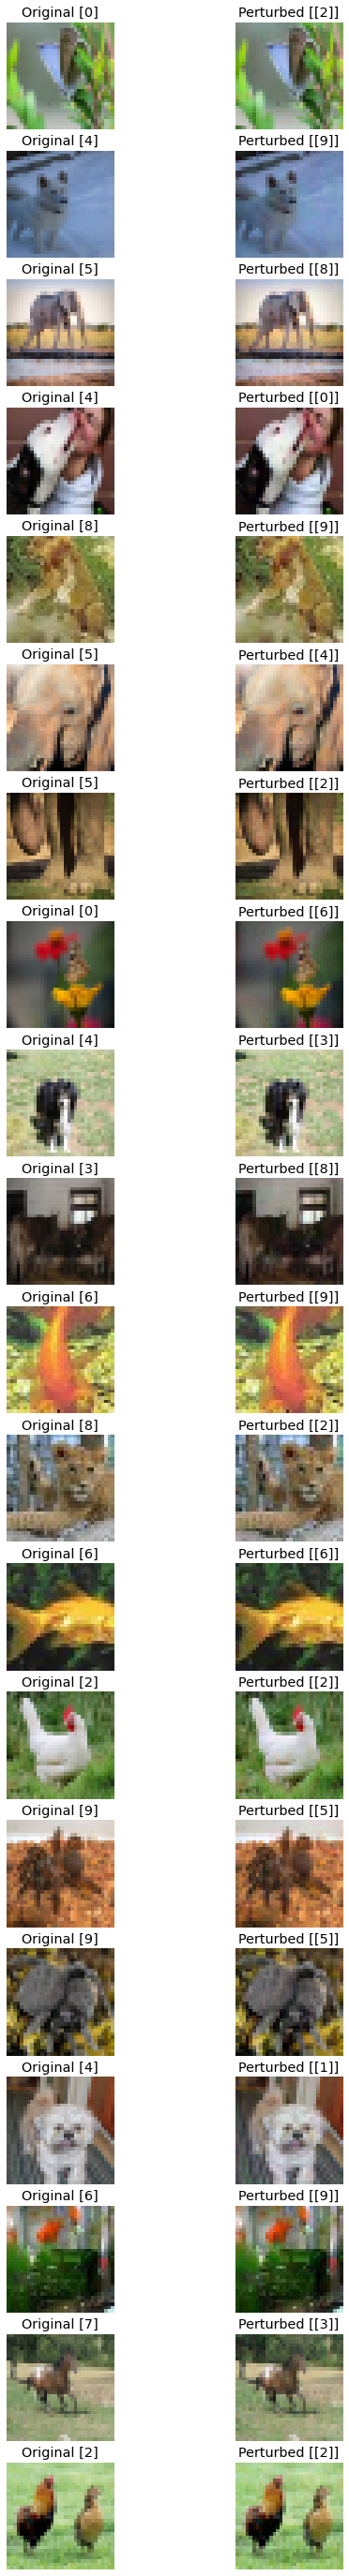

In [239]:
# Visualization for PGD Attack
visualize_adv_attack(PGD_attack, num_images=20, model=model_to_attack.model, data_manager=data_manager, is_batch=False)

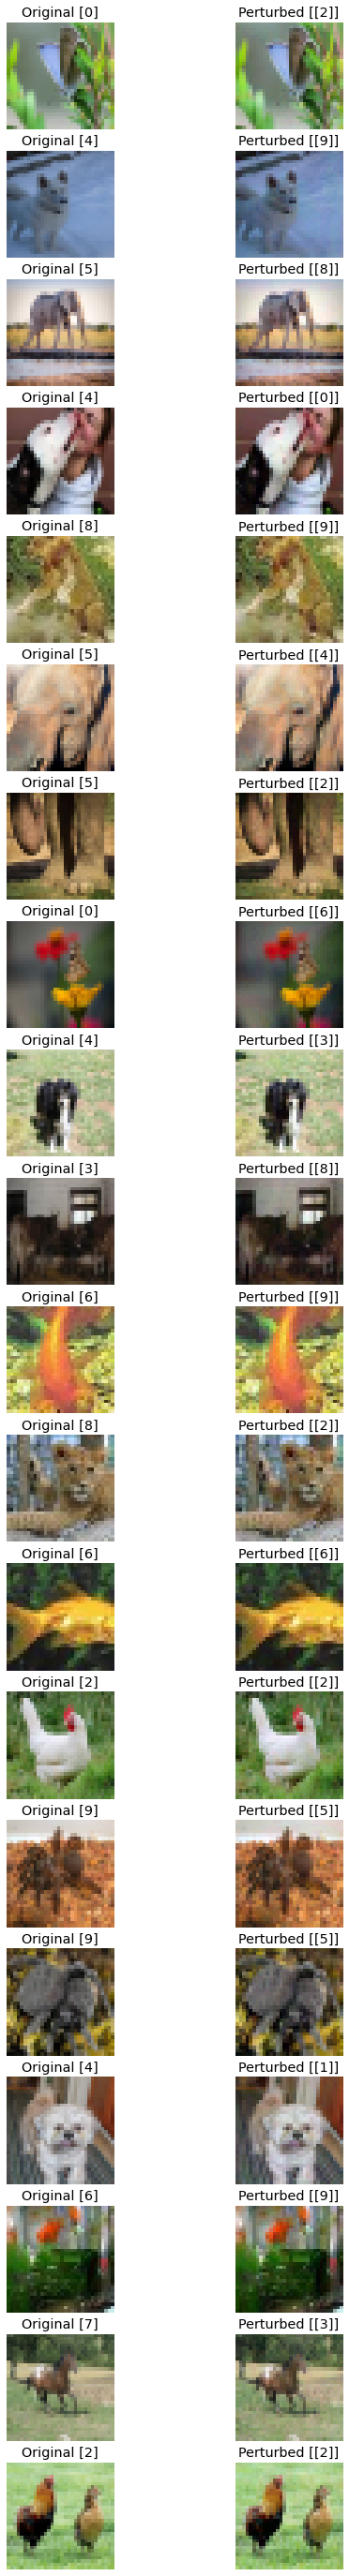

In [240]:
# Visualization for MIM attack
visualize_adv_attack(mim_attack, num_images=20, model=model_to_attack.model, data_manager=data_manager, is_batch=False)

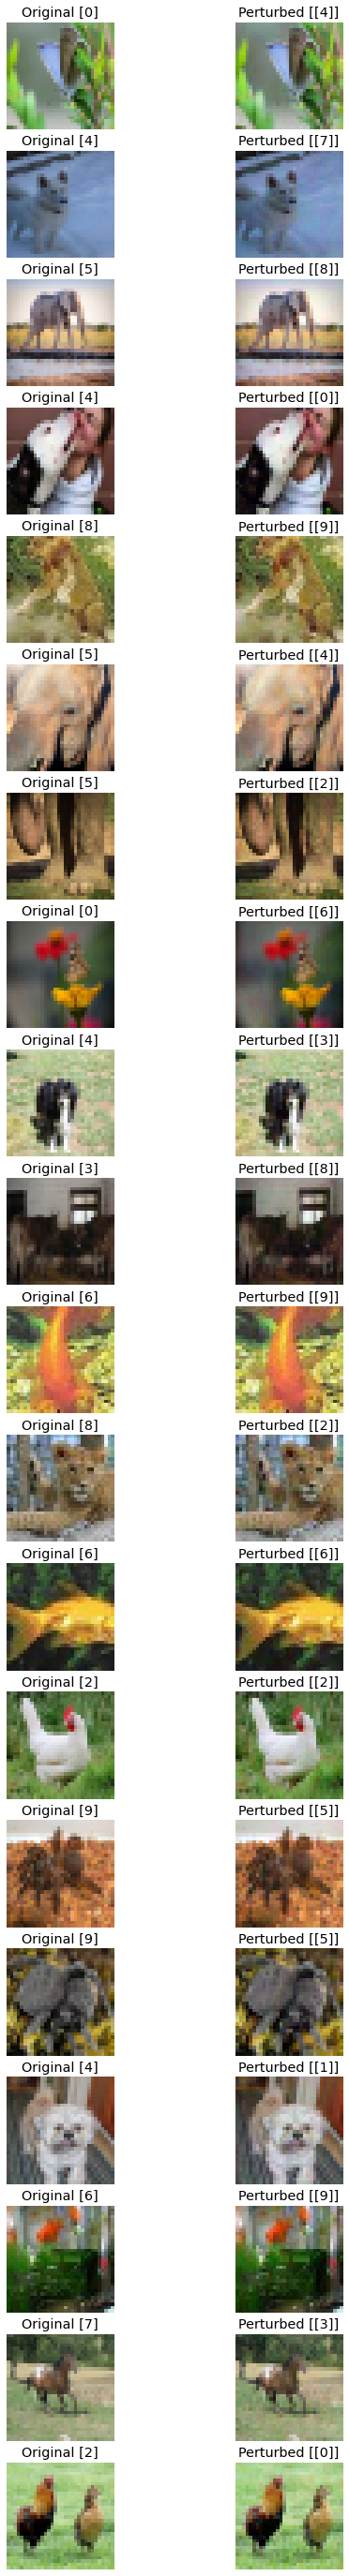

In [241]:
# Visualization for FGSM attack
visualize_adv_attack(fgsm_attack, num_images=20, model=model_to_attack.model, data_manager=data_manager, is_batch=False)

<span style="color:red">**Question 3.9**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

### After adversarial training
My model has improved its ability to predict even perturbed samples by 3%. I believe there are some causes for this low accuracy still. 
1. The model cannot work well with the increased capabilities of the adversarial attack after training at a lower capability. 
2. The model was already very weak to begin with and can't predict normal labels well enough. 

In [256]:
# Declaring a model to attack based on the best model previously found.
model_to_defend = ImageAugmentation(num_blocks=3, use_skip=True, learning_rate=0.001, is_augmentation=True, batch_size=32, num_classes=10)
model_to_defend.build_cnn()

In [257]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)
loss_obj = tf.keras.losses.sparse_categorical_crossentropy

# metrics to track the different accuracies.
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

In [258]:
def train_step_adv(x, x_adv, y):
    # x = np.expand_dims(x, axis=0)
    # x_adv = np.expand_dims(x_adv, axis=0)
    with tf.GradientTape() as tape:
        y_pred = model_to_defend.model(x)
        adv_pred = model_to_defend.model(x_adv)
        loss = (loss_obj(y, y_pred, from_logits=False) + loss_obj(y, adv_pred, from_logits=False))/2
        gradients = tape.gradient(loss, model_to_defend.model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_to_defend.model.trainable_variables))
    return loss

In [259]:
def adversarial_training(model, attack_fn, epochs, **kwargs):
    history = {
        'loss':[],
        'acc':[]
    }
    dataset = tf.data.Dataset.from_tensor_slices((data_manager.X_train.astype(np.float32), data_manager.y_train)).batch(32)
    for epoch in range(epochs):
        print(f"Start training at epoch {epoch} -----------------------------------")
        for index, (x, y) in enumerate(dataset):
            x_adv, _ = attack_fn(model.model, x, y, **kwargs)
            loss = train_step_adv(x, x_adv, y)
            y_pred = model.model(x)
            test_acc_clean(y, y_pred)
            train_loss(loss)
        history['loss'].append(train_loss.result()) 
        history['acc'].append(test_acc_clean.result() * 100)
        print(f"End Training at epoch {epoch} -- accuracy {history['acc'][epoch]}")

    return history 

In [260]:
history = adversarial_training(model_to_defend, PGD_attack, epochs=20, num_steps=10)

Start training at epoch 0 -----------------------------------
End Training at epoch 0 -- accuracy 35.29999923706055
Start training at epoch 1 -----------------------------------
End Training at epoch 1 -- accuracy 42.07500076293945
Start training at epoch 2 -----------------------------------
End Training at epoch 2 -- accuracy 46.78333282470703
Start training at epoch 3 -----------------------------------
End Training at epoch 3 -- accuracy 50.42499923706055
Start training at epoch 4 -----------------------------------
End Training at epoch 4 -- accuracy 53.630001068115234
Start training at epoch 5 -----------------------------------
End Training at epoch 5 -- accuracy 56.579166412353516
Start training at epoch 6 -----------------------------------
End Training at epoch 6 -- accuracy 59.41785430908203
Start training at epoch 7 -----------------------------------
End Training at epoch 7 -- accuracy 62.19375228881836
Start training at epoch 8 -----------------------------------
End Trai

In [261]:
model_to_defend.model.save("models/q3.9")

In [ ]:
model_to_defend = tf.keras.load_model('models/q3.9')

In [262]:
def adversarial_test(model, attack_fn, **attack_fn_kwargs):
    y_adv = []
    y_true = []
    dataset = tf.data.Dataset.from_tensor_slices((data_manager.X_test.astype(np.float32), data_manager.y_test)).batch(32)
    for idx, (X_batch, y_batch) in enumerate(dataset):
        X_batch_adv, _ = attack_fn(model.model, X_batch, y_batch, **attack_fn_kwargs)
        y_batch_adv = np.argmax(model.model(X_batch_adv), 1)
        y_adv.extend([ int(i) for i in list(y_batch_adv)])
        y_true.extend([ int(i) for i in list(y_batch)])

    return y_true, y_adv 

In [263]:
y_true_pgd, y_adv_pgd = adversarial_test(model_to_defend, PGD_attack, num_steps=20)

In [264]:
y_true_mim, y_adv_mim = adversarial_test(model_to_defend, mim_attack, num_steps=20)

In [265]:
y_true_fgsm, y_adv_fgsm = adversarial_test(model_to_defend, fgsm_attack)

In [267]:
from sklearn.metrics import accuracy_score
test_adv_acc_pgd = accuracy_score(y_true_pgd, y_adv_pgd)
test_adv_acc_mim = accuracy_score(y_true_mim, y_adv_mim)
test_adv_acc_fgsm = accuracy_score(y_true_fgsm, y_adv_fgsm)
print("Test adv accuracy with PGD:{}".format(test_adv_acc_pgd))
print("Test adv accuracy with MIM:{}".format(test_adv_acc_mim))
print("Test adv accuracy with FGSM:{}".format(test_adv_acc_fgsm))

Test adv accuracy with PGD:0.182
Test adv accuracy with MIM:0.186
Test adv accuracy with FGSM:0.17


The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

In [ ]:
# No answer